**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.neighbors import KDTree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [64]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors=5, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self._fit_method = algorithm

    def fit(self, X, y):
        self.X = X
        if self._fit_method == 'kd_tree':
            self.tree = KDTree(X)
        self.y = y
        self.labels = np.unique(y)
        self.l_num = self.labels.shape[0]

    def _get_arr(self, X):
        if self._fit_method == 'kd_tree':
            _, ind = self.tree.query(X, k=self.n_neighbors)
            return self.y[ind]
        else:
            ind = np.argpartition(sc.spatial.distance.cdist(X, self.X),
                                  self.n_neighbors)
            return self.y[ind[:, :self.n_neighbors]]

    def predict(self, X):
        arr = self._get_arr(X)
        return np.array(sc.stats.mode(arr, axis=1))[0].reshape(len(X))

    def predict_proba(self, X):
        arr = self._get_arr(X).astype(int)
        return np.apply_along_axis(lambda x:
                                   np.bincount(x, minlength=self.l_num) /
                                   self.n_neighbors,
                                   1, arr)

    def score(self, X, y):
        pred = self.predict(X)
        return sum(pred == y) / len(y)

**IRIS**

In [67]:
iris = datasets.load_iris()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, stratify=iris.target)

In [69]:
clf = KNeighborsClassifier(n_neighbors=5)
my_clf = MyKNeighborsClassifier(n_neighbors=5)

In [70]:
%time clf.fit(X_train, y_train)

CPU times: user 2.98 ms, sys: 0 ns, total: 2.98 ms
Wall time: 2.63 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
%time my_clf.fit(X_train, y_train)

CPU times: user 3.02 ms, sys: 0 ns, total: 3.02 ms
Wall time: 3.58 ms


In [72]:
%time clf.predict(X_test)

CPU times: user 1.39 ms, sys: 0 ns, total: 1.39 ms
Wall time: 1.12 ms


array([2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0,
       1, 0, 1, 1, 2, 1, 0])

In [73]:
%time my_clf.predict(X_test)

CPU times: user 3.56 ms, sys: 49 µs, total: 3.61 ms
Wall time: 2.31 ms


array([2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0,
       1, 0, 1, 1, 2, 1, 0])

In [74]:
%time clf.predict_proba(X_test)

CPU times: user 1.71 ms, sys: 24 µs, total: 1.73 ms
Wall time: 1.2 ms


array([[ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.4,  0.6],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.6,  0.4],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.4,  0.6],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ]])

In [75]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.64 ms, sys: 23 µs, total: 1.67 ms
Wall time: 992 µs


array([[ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.4,  0.6],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.6,  0.4],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0.4,  0.6],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.2,  0.8],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ]])

In [76]:
clf.score(X_test, y_test)

0.93333333333333335

In [77]:
my_clf.score(X_test, y_test)

0.93333333333333335

Задание 3

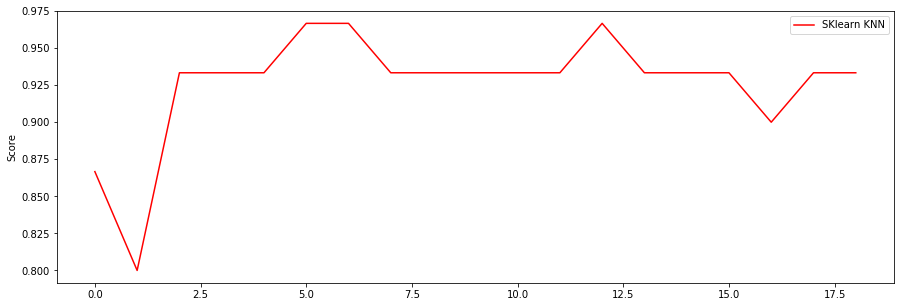

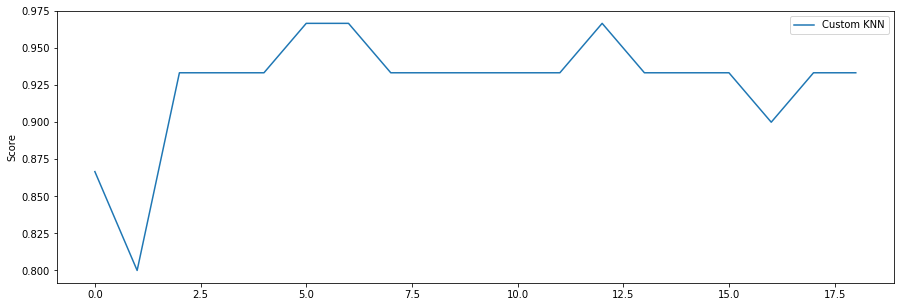

In [78]:
buf1 = []
buf2 = []
for k in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=k)
    my_clf = MyKNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    buf1.append(clf.score(X_test, y_test))
    buf2.append(my_clf.score(X_test, y_test))

fig = plt.figure(figsize=(15, 5))
ax1 = plt.plot(buf1, 'r', label='SKlearn KNN')
plt.ylabel("Score")
plt.legend(loc='upper right')

fig = plt.figure(figsize=(15, 5))
ax2 = plt.plot(buf2, label='Custom KNN')
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.show()

In [79]:
optim_param = np.argmax(buf1) + 1
optim_param

6

**MNIST**

In [80]:
mnist = fetch_mldata('MNIST original')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [82]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [83]:
%time clf.fit(X_train, y_train)

CPU times: user 36.5 s, sys: 212 ms, total: 36.7 s
Wall time: 36.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [84]:
%time my_clf.fit(X_train, y_train)

CPU times: user 4.17 ms, sys: 1 µs, total: 4.17 ms
Wall time: 3.5 ms


In [85]:
%time clf.predict(X_test)

CPU times: user 1min 28s, sys: 7.6 ms, total: 1min 28s
Wall time: 1min 28s


array([ 2.,  9.,  9.,  4.,  4.,  0.,  4.,  8.,  2.,  3.,  2.,  5.,  1.,
        2.,  5.,  9.,  0.,  7.,  8.,  5.,  8.,  6.,  8.,  8.,  4.,  8.,
        3.,  6.,  3.,  0.,  0.,  2.,  1.,  2.,  3.,  3.,  4.,  6.,  8.,
        8.,  9.,  5.,  7.,  6.,  1.,  7.,  9.,  5.,  0.,  3.,  8.,  7.,
        2.,  4.,  9.,  2.,  4.,  9.,  2.,  3.,  0.,  0.,  3.,  6.,  2.,
        8.,  7.,  0.,  3.,  2.,  2.,  0.,  8.,  4.,  5.,  4.,  2.,  2.,
        6.,  1.,  8.,  4.,  8.,  4.,  3.,  5.,  4.,  1.,  0.,  3.,  7.,
        1.,  1.,  1.,  1.,  0.,  2.,  1.,  3.,  1.,  0.,  0.,  7.,  7.,
        8.,  1.,  7.,  5.,  5.,  1.,  6.,  2.,  2.,  9.,  6.,  4.,  3.,
        7.,  4.,  0.,  6.,  4.,  1.,  4.,  1.,  9.,  5.,  1.,  7.,  9.,
        1.,  3.,  3.,  0.,  6.,  9.,  0.,  1.,  0.,  2.,  4.,  1.,  0.,
        3.,  8.,  3.,  1.,  7.,  6.,  3.,  9.,  3.,  3.,  8.,  0.,  0.,
        8.,  9.,  2.,  1.,  5.,  4.,  1.,  9.,  7.,  3.,  6.,  9.,  2.,
        9.,  6.,  6.,  1.,  1.,  0.,  5.,  1.,  1.,  9.,  1.,  9

In [86]:
%time my_clf.predict(X_test)

CPU times: user 32.1 s, sys: 536 ms, total: 32.7 s
Wall time: 32.7 s


array([ 2.,  9.,  9.,  4.,  4.,  0.,  4.,  8.,  2.,  3.,  2.,  5.,  1.,
        2.,  5.,  9.,  0.,  7.,  8.,  5.,  8.,  6.,  8.,  8.,  4.,  8.,
        3.,  6.,  3.,  0.,  0.,  2.,  1.,  2.,  3.,  3.,  4.,  6.,  8.,
        8.,  9.,  5.,  7.,  6.,  1.,  7.,  9.,  5.,  0.,  3.,  8.,  7.,
        2.,  4.,  9.,  2.,  4.,  9.,  2.,  3.,  0.,  0.,  3.,  6.,  2.,
        8.,  7.,  0.,  3.,  2.,  2.,  0.,  8.,  4.,  5.,  4.,  2.,  2.,
        6.,  1.,  8.,  4.,  8.,  4.,  3.,  5.,  4.,  1.,  0.,  3.,  7.,
        1.,  1.,  1.,  1.,  0.,  2.,  1.,  3.,  1.,  0.,  0.,  7.,  7.,
        8.,  1.,  7.,  5.,  5.,  1.,  6.,  2.,  2.,  9.,  6.,  4.,  3.,
        7.,  4.,  0.,  6.,  4.,  1.,  4.,  1.,  9.,  5.,  1.,  7.,  9.,
        1.,  3.,  3.,  0.,  6.,  9.,  0.,  1.,  0.,  2.,  4.,  1.,  0.,
        3.,  8.,  3.,  1.,  7.,  6.,  3.,  9.,  3.,  3.,  8.,  0.,  0.,
        8.,  9.,  2.,  1.,  5.,  4.,  1.,  9.,  7.,  3.,  6.,  9.,  2.,
        9.,  6.,  6.,  1.,  1.,  0.,  5.,  1.,  1.,  9.,  1.,  9

In [87]:
%time clf.predict_proba(X_test)

CPU times: user 1min 29s, sys: 91.9 ms, total: 1min 29s
Wall time: 1min 29s


array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [88]:
%time my_clf.predict_proba(X_test)

CPU times: user 31.2 s, sys: 464 ms, total: 31.7 s
Wall time: 31.7 s


array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [89]:
%time clf.score(X_test, y_test)

CPU times: user 1min 28s, sys: 100 ms, total: 1min 28s
Wall time: 1min 28s


0.97142857142857142

In [90]:
%time my_clf.score(X_test, y_test)

CPU times: user 31.2 s, sys: 444 ms, total: 31.7 s
Wall time: 31.7 s


0.97142857142857142

Задание 4

In [102]:
clf = KNeighborsClassifier(n_neighbors=6, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=6, algorithm='kd_tree')

In [103]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [104]:
%time clf.fit(X_train, y_train)

CPU times: user 35.3 s, sys: 320 ms, total: 35.6 s
Wall time: 35.6 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [105]:
%time my_clf.fit(X_train, y_train)

CPU times: user 33.2 s, sys: 188 ms, total: 33.4 s
Wall time: 33.3 s


In [106]:
%time clf.predict(X_test)

CPU times: user 1min 28s, sys: 80 ms, total: 1min 28s
Wall time: 1min 28s


array([ 1.,  8.,  0.,  6.,  0.,  8.,  0.,  4.,  1.,  3.,  3.,  4.,  4.,
        5.,  5.,  8.,  3.,  8.,  9.,  1.,  3.,  7.,  5.,  8.,  2.,  1.,
        1.,  4.,  2.,  2.,  9.,  5.,  5.,  9.,  0.,  6.,  9.,  5.,  1.,
        2.,  8.,  8.,  7.,  1.,  3.,  1.,  0.,  6.,  5.,  2.,  5.,  3.,
        7.,  7.,  5.,  4.,  0.,  3.,  5.,  8.,  7.,  2.,  2.,  5.,  6.,
        5.,  1.,  0.,  1.,  1.,  4.,  1.,  7.,  8.,  7.,  2.,  1.,  0.,
        8.,  7.,  8.,  5.,  1.,  2.,  9.,  5.,  9.,  2.,  8.,  6.,  1.,
        6.,  1.,  1.,  2.,  8.,  4.,  2.,  0.,  1.,  1.,  9.,  9.,  0.,
        9.,  6.,  9.,  5.,  7.,  9.,  1.,  8.,  5.,  1.,  9.,  9.,  9.,
        1.,  9.,  5.,  2.,  7.,  4.,  7.,  3.,  5.,  4.,  0.,  4.,  1.,
        0.,  0.,  2.,  9.,  5.,  9.,  7.,  2.,  4.,  5.,  2.,  5.,  6.,
        7.,  6.,  2.,  9.,  5.,  7.,  8.,  5.,  1.,  4.,  8.,  4.,  3.,
        7.,  2.,  7.,  9.,  7.,  2.,  4.,  1.,  4.,  6.,  0.,  6.,  5.,
        2.,  8.,  8.,  0.,  3.,  2.,  9.,  0.,  3.,  3.,  7.,  2

In [107]:
%time my_clf.predict(X_test)

CPU times: user 1min 15s, sys: 7.98 ms, total: 1min 15s
Wall time: 1min 15s


array([ 1.,  8.,  0.,  6.,  0.,  8.,  0.,  4.,  1.,  3.,  3.,  4.,  4.,
        5.,  5.,  8.,  3.,  8.,  9.,  1.,  3.,  7.,  5.,  8.,  2.,  1.,
        1.,  4.,  2.,  2.,  9.,  5.,  5.,  9.,  0.,  6.,  9.,  5.,  1.,
        2.,  8.,  8.,  7.,  1.,  3.,  1.,  0.,  6.,  5.,  2.,  5.,  3.,
        7.,  7.,  5.,  4.,  0.,  3.,  5.,  8.,  7.,  2.,  2.,  5.,  6.,
        5.,  1.,  0.,  1.,  1.,  4.,  1.,  7.,  8.,  7.,  2.,  1.,  0.,
        8.,  7.,  8.,  5.,  1.,  2.,  9.,  5.,  9.,  2.,  8.,  6.,  1.,
        6.,  1.,  1.,  2.,  8.,  4.,  2.,  0.,  1.,  1.,  9.,  9.,  0.,
        9.,  6.,  9.,  5.,  7.,  9.,  1.,  8.,  5.,  1.,  9.,  9.,  9.,
        1.,  9.,  5.,  2.,  7.,  4.,  7.,  3.,  5.,  4.,  0.,  4.,  1.,
        0.,  0.,  2.,  9.,  5.,  9.,  7.,  2.,  4.,  5.,  2.,  5.,  6.,
        7.,  6.,  2.,  9.,  5.,  7.,  8.,  5.,  1.,  4.,  8.,  4.,  3.,
        7.,  2.,  7.,  9.,  7.,  2.,  4.,  1.,  4.,  6.,  0.,  6.,  5.,
        2.,  8.,  8.,  0.,  3.,  2.,  9.,  0.,  3.,  3.,  7.,  2

In [108]:
%time clf.predict_proba(X_test)

CPU times: user 1min 28s, sys: 20 ms, total: 1min 28s
Wall time: 1min 28s


array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.66666667,  0.        ,  0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [109]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 15s, sys: 12 ms, total: 1min 15s
Wall time: 1min 15s


array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.66666667,  0.        ,  0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
%time clf.score(X_test, y_test)

CPU times: user 1min 28s, sys: 7.03 ms, total: 1min 28s
Wall time: 1min 28s


0.96857142857142853

In [ ]:
%time my_clf.score(X_test, y_test)

Задание 5

In [101]:
# seaborn - библиотека для визуализации, основанная на matplotlib
# matplotlib - основная библиотека для визуализации
# train_test_split - метод для разделения выборки на обучающую и тестовую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - объект конвейера для последовательных преобразований с некоторой моделью в конце
# StandardScaler (from sklearn.preprocessing import StandardScaler) - функция для центрирования и нормирования выборки
# ClassifierMixin - базовый класс для всех классификаторов, реализует метод score(), возвращающий метрику accuracy
# NeighborsBase - метод _fit() вызывается после вызова метода fit() класса SupervisedIntegerMixin и реализует логику по сохранению выборки X 
# и устнановки параметров метрики.Метод _check_algorithm_metric используется для проверки параметров метрики
# KNeighborsMixin - реализует функции kneighbors и kneighbors_graph для нахождения k ближайших соседей и построения графа соседей соответственно
# SupervisedIntegerMixin - используется для проверки типа y при вызове fit()